In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import the specific warning class if needed

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
data = pd.read_csv('yield.csv')

In [4]:
data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
selected_columns = ['Area', 'Item', 'Year', 'Value']
df = data[selected_columns]

In [6]:
user_country = input("Enter the country: ")

Enter the country: India


In [7]:
available_crops = df[df['Area'] == user_country]['Item'].unique()

In [8]:
if len(available_crops) == 0:
    print(f"No data found for {user_country}.")
else:
    print(f"Available crops in {user_country}:")
    for i, crop in enumerate(available_crops):
        print(f"{i + 1}. {crop}")

    # Receive user input for the selected crop
    user_crop_name = input("Enter the name of the desired crop: ")

    if user_crop_name not in available_crops:
        print("Invalid selection. Please enter a valid crop name.")
    else:
        user_crop = user_crop_name

        # Filter data for the selected country and crop
        user_data = df[(df['Area'] == user_country) & (df['Item'] == user_crop)]

        # Split data into training and testing sets (You may need more advanced data splitting)
        X = user_data[['Year']]
        y = user_data['Value']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Receive user input for the year to make a prediction
        user_year = int(input("Enter the year for prediction: "))

        # Predict production for the user-specified year
        predicted_yield = model.predict([[user_year]])[0]

        print(f"Predicted yield for {user_crop} in {user_country} in {user_year}: {predicted_yield} hg/ha")

Available crops in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat
Enter the name of the desired crop: Maize
Enter the year for prediction: 2090
Predicted yield for Maize in India in 2090: 47506.834265057 hg/ha


Enter the country: India
Available crops in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat
Enter the name of the desired crop: Potatoes
Enter the year for prediction: 2090


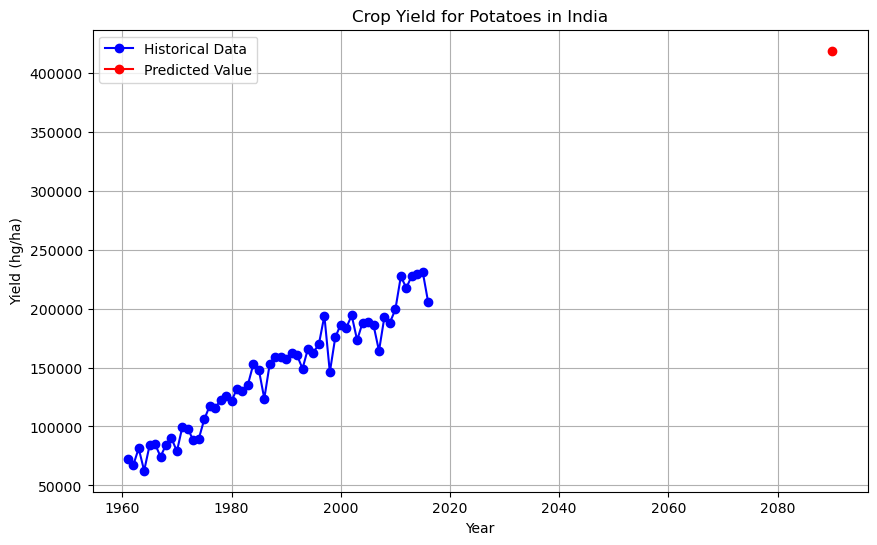

Predicted yield for Potatoes in India in 2090: 418631.6021899609 hg/ha


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Assuming your dataset is loaded into a variable named 'data'

# Assuming your dataset columns are as follows
# Domain Code, Domain, Area Code, Area, Element Code, Element, Item Code, Item, Year Code, Year, Unit, Value
# You can adjust column names accordingly

# Select relevant columns (Country, Crop, Year, Yield)
selected_columns = ['Area', 'Item', 'Year', 'Value']
df = data[selected_columns]

# Receive user input for the country
user_country = input("Enter the country: ")

# Filter data to get available crops in the selected country
available_crops = df[df['Area'] == user_country]['Item'].unique()

if len(available_crops) == 0:
    print(f"No data found for {user_country}.")
else:
    print(f"Available crops in {user_country}:")
    for i, crop in enumerate(available_crops):
        print(f"{i + 1}. {crop}")

    # Receive user input for the selected crop
    user_crop_name = input("Enter the name of the desired crop: ")

    if user_crop_name not in available_crops:
        print("Invalid selection. Please enter a valid crop name.")
    else:
        user_crop = user_crop_name

        # Filter data for the selected country and crop
        user_data = df[(df['Area'] == user_country) & (df['Item'] == user_crop)]

        # Split data into training and testing sets (You may need more advanced data splitting)
        X = user_data[['Year']]
        y = user_data['Value']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Receive user input for the year to make a prediction
        user_year = int(input("Enter the year for prediction: "))

        # Predict production for the user-specified year
        predicted_yield = model.predict([[user_year]])[0]

        # Plot historical data and the predicted value as a line chart
        plt.figure(figsize=(10, 6))
        plt.plot(user_data['Year'], user_data['Value'], label='Historical Data', color='blue', marker='o', linestyle='-')
        plt.plot(user_year, predicted_yield, label='Predicted Value', color='red', marker='o')
        plt.xlabel('Year')
        plt.ylabel('Yield (hg/ha)')
        plt.title(f'Crop Yield for {user_crop} in {user_country}')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Predicted yield for {uuser_crop} in {user_country} in {user_year}: {predicted_yield} hg/ha")


Enter the country: India


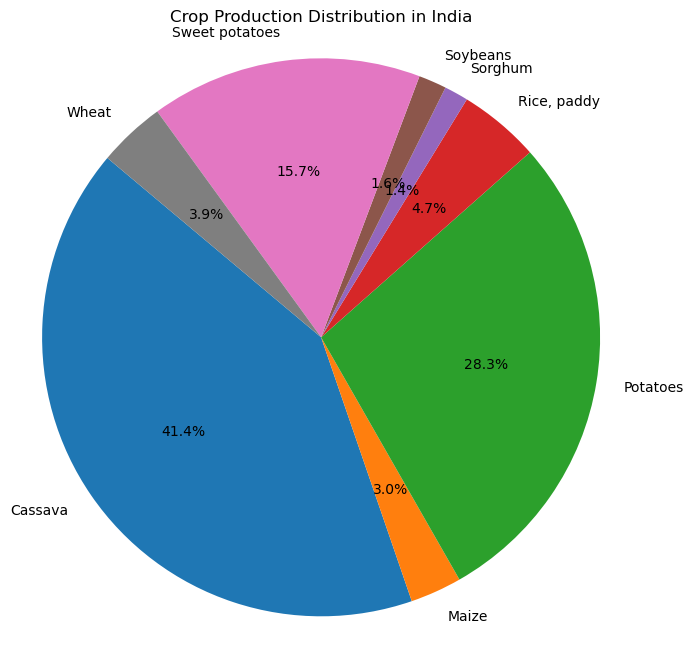

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

user_country = input("Enter the country: ")

# Filter data to get available crops in the selected country
df_country = data[data['Area'] == user_country]

if df_country.empty:
    print(f"No data found for {user_country}.")
else:
    # Group the data by crop and calculate the total production
    crop_production = df_country.groupby('Item')['Value'].sum()

    # Create a pie chart to visualize crop production
    plt.figure(figsize=(8, 8))
    plt.pie(crop_production, labels=crop_production.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Crop Production Distribution in {user_country}')
    plt.show()


Enter the country: American Samoa
Available crops in American Samoa:
1. Cassava
2. Yams
Enter a crop name (or 'done' to finish): Yams
Enter a crop name (or 'done' to finish): Cassava
Enter a crop name (or 'done' to finish): done


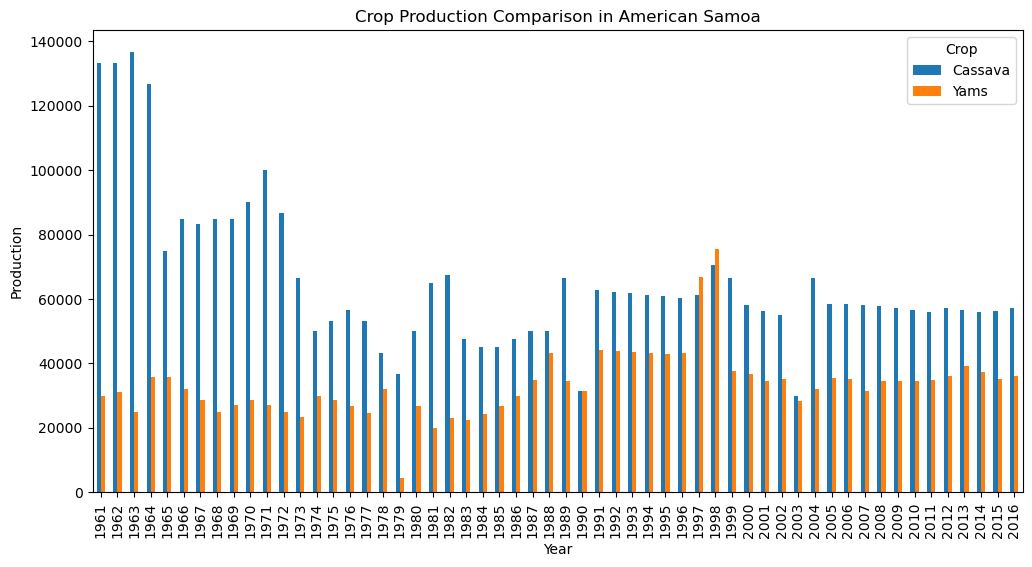

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Assuming your dataset is loaded into a variable named 'data'

# Assuming your dataset columns are as follows
# Domain Code, Domain, Area Code, Area, Element Code, Element, Item Code, Item, Year Code, Year, Unit, Value
# You can adjust column names accordingly

# Receive user input for the country
user_country = input("Enter the country: ")

# Filter data to get available crops in the selected country
df_country = data[data['Area'] == user_country]

if df_country.empty:
    print(f"No data found for {user_country}.")
else:
    # Get a list of available crops in the selected country
    available_crops = df_country['Item'].unique()

    if len(available_crops) == 0:
        print(f"No crops found for {user_country}.")
    else:
        print(f"Available crops in {user_country}:")
        for i, crop in enumerate(available_crops):
            print(f"{i + 1}. {crop}")

        # Create an empty list to store selected crops
        selected_crops = []

        # Receive user input for crop names (user can enter as many as desired)
        while True:
            user_crop = input("Enter a crop name (or 'done' to finish): ")
            if user_crop.lower() == 'done':
                break
            if user_crop not in available_crops:
                print(f"{user_crop} is not a valid crop in {user_country}.")
            else:
                selected_crops.append(user_crop)

        if not selected_crops:
            print("No valid crops selected.")
        else:
            # Filter data for the selected crops
            df_selected_crops = df_country[df_country['Item'].isin(selected_crops)]

            if df_selected_crops.empty:
                print("No data found for the selected crops.")
            else:
                # Pivot the data to create a side-by-side bar graph
                df_pivot = df_selected_crops.pivot(index='Year', columns='Item', values='Value')

                # Plot a side-by-side bar graph
                df_pivot.plot(kind='bar', figsize=(12, 6))
                plt.title(f'Crop Production Comparison in {user_country}')
                plt.xlabel('Year')
                plt.ylabel('Production')
                plt.legend(title='Crop')
                plt.show()


Enter the country: Russian Federation


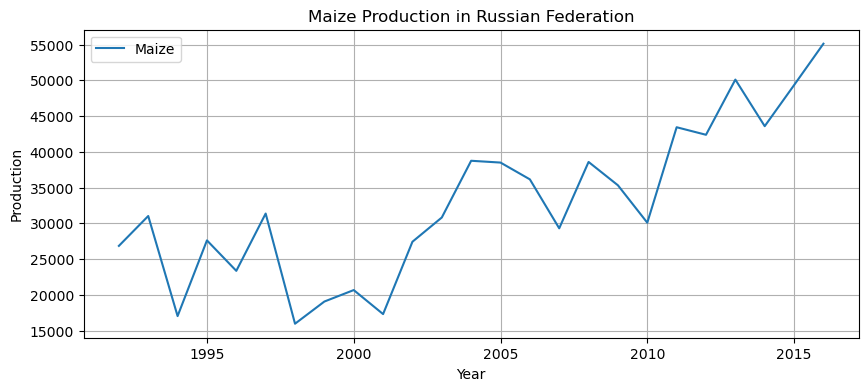

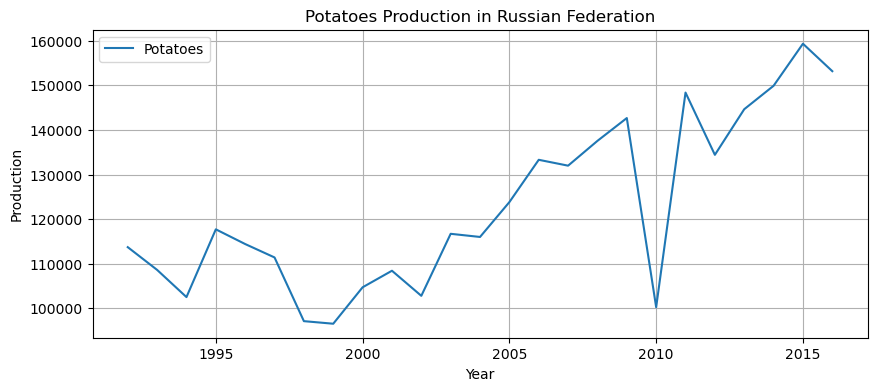

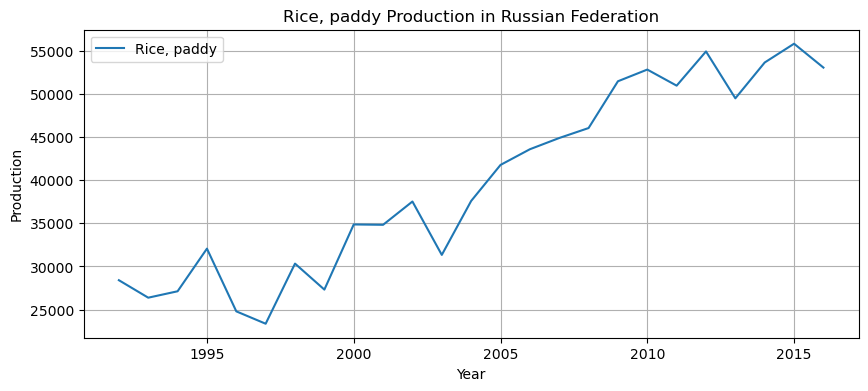

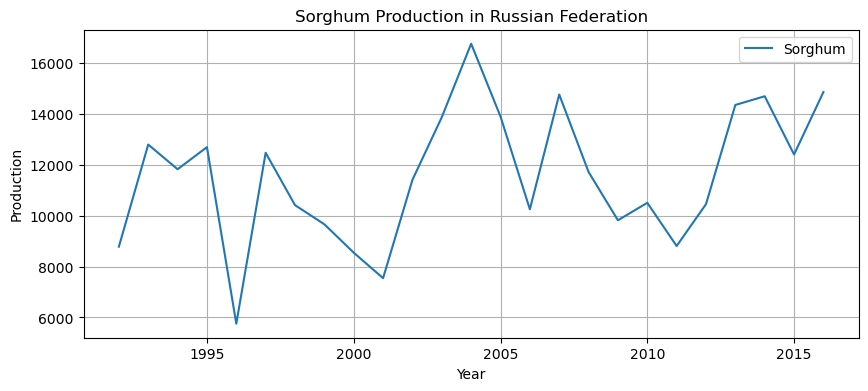

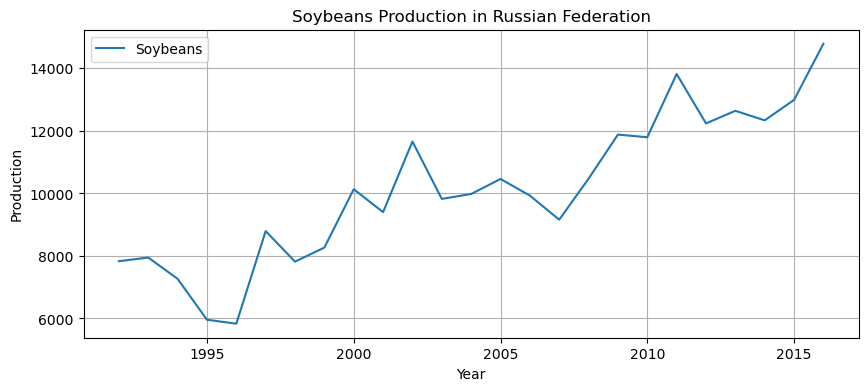

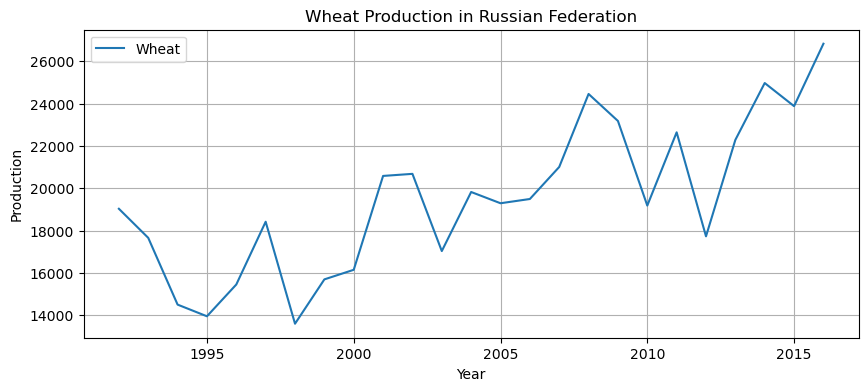

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Receive user input for the country
user_country = input("Enter the country: ")

# Filter data to get available crops in the selected country
df_country = data[data['Area'] == user_country]

if df_country.empty:
    print(f"No data found for {user_country}.")
else:
    # Group the data by crop and calculate the total production
    crop_production = df_country.groupby('Item')

    # Create separate line graphs for each crop
    for crop, production in crop_production:
        plt.figure(figsize=(10, 4))
        plt.plot(production['Year'], production['Value'], label=crop)
        plt.title(f'{crop} Production in {user_country}')
        plt.xlabel('Year')
        plt.ylabel('Production')
        plt.legend()
        plt.grid(True)
        plt.show()


In [13]:
import pickle

In [14]:
pickle.dump(data,open('country.pkl','wb'))

In [15]:
pickle.dump(data.to_dict(),open('country_dict.pkl','wb'))